## Fis distribution by population

I calculated Fis using the ``hierfstat`` package in R, and then plotted the distributions of Fis by population. These plots exclude NA values which made up a tiny bit over half of the data, and I'm not entirely sure what produces an NA value still. So take this with a grain of salt!

 **20170324**
Also, I updated this notebook when I removed replicates from the Genepop files, and ran the same Fis on the tags Genepop file.

#### SNPS

In [25]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2


In [26]:
fis_file = open("Fis_snps_20170324.csv", "r") # read in file

lines = fis_file.readlines() # exclude header
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines

header_pops = headerline.strip().split(",")
header_pops = header_pops[1:]

actual_names = ["WA_Strait","WA_SanJuans","WA_Dabob","AK","CA_Catalina"]

In [27]:
fis_sets = []
NA_count = 0
total_count = 0

snp_all_fis = []
for pop in header_pops:
    pop_fis = []
    pop_index = header_pops.index(pop) + 1
    for line in restlines:
        linelist = line.strip().split(",")
        snp_fis = linelist[pop_index]
        if snp_fis == "NA":
            NA_count += 1
            total_count += 1
        elif snp_fis != "NA":
            snp_fis = float(snp_fis)
            pop_fis.append(snp_fis)
            snp_all_fis.append(snp_fis)
            total_count += 1
    fis_sets.append(pop_fis)

print "NA count: " + str(NA_count)
print "NAs made up " + str(float(NA_count)/float(total_count)*100)[0:5] + "% of your Fis estimates."

NA count: 8920
NAs made up 11.83% of your Fis estimates.


In [28]:
import numpy as np
import matplotlib.pyplot as plt

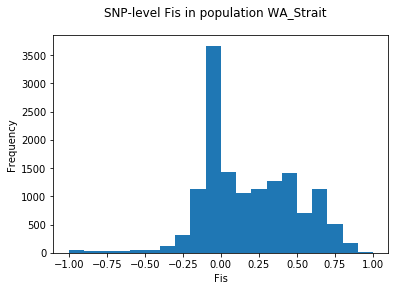

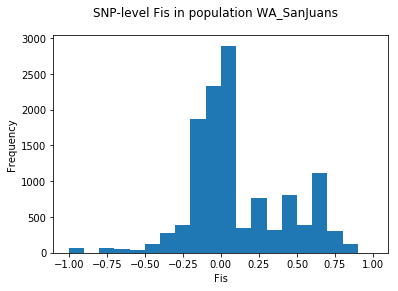

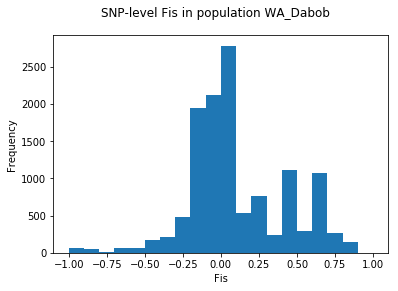

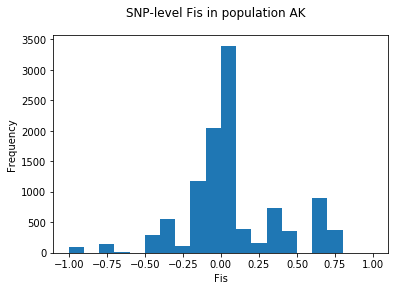

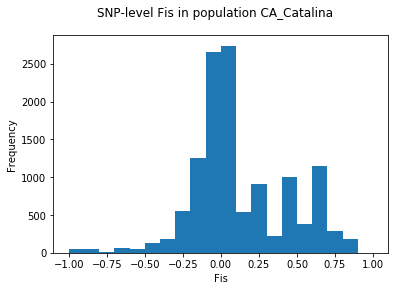

In [29]:
for i in range(0,len(header_pops)):
    plt.hist(fis_sets[i], bins = np.arange(-1, 1.1, .1))
    plt.suptitle("SNP-level Fis in population " + actual_names[i])
    plt.xlabel("Fis")
    plt.ylabel("Frequency")
    plt.show()

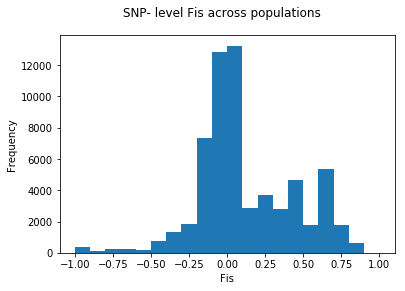

In [30]:
plt.hist(snp_all_fis, bins = np.arange(-1, 1.1, .1))
plt.suptitle("SNP- level Fis across populations")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [31]:
fis_file = open("Fis_tags_20170324.csv", "r") # read in file

lines = fis_file.readlines() # exclude header
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines

header_pops = headerline.strip().split(",")
header_pops = header_pops[1:]

print header_pops # check working

fis_sets = []
NA_count = 0
total_count = 0

tag_all_fis = []
for pop in header_pops:
    pop_fis = []
    pop_index = header_pops.index(pop) + 1
    for line in restlines:
        linelist = line.strip().split(",")
        snp_fis = linelist[pop_index]
        if snp_fis == "NA":
            NA_count += 1
            total_count += 1
        elif snp_fis != "NA":
            snp_fis = float(snp_fis)
            pop_fis.append(snp_fis)
            tag_all_fis.append(snp_fis)
            total_count += 1
    fis_sets.append(pop_fis)

print "NA count: " + str(NA_count)
print "NAs made up " + str(float(NA_count)/float(total_count)*100)[0:5] + "% of your Fis estimates."


['FG035', 'FG111', 'FG212', 'Q326', 'Q356']
NA count: 2055
NAs made up 7.781% of your Fis estimates.


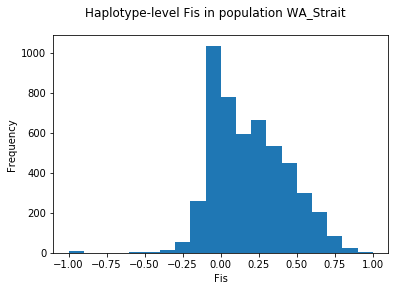

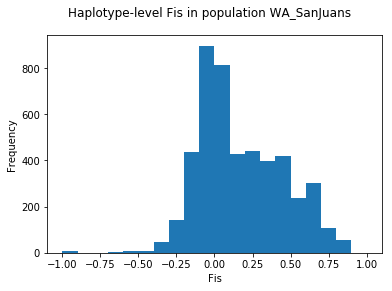

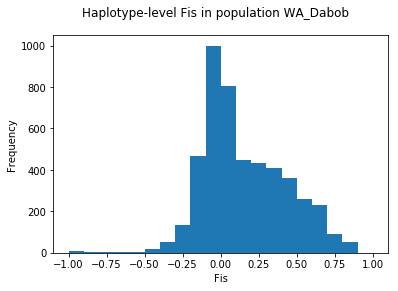

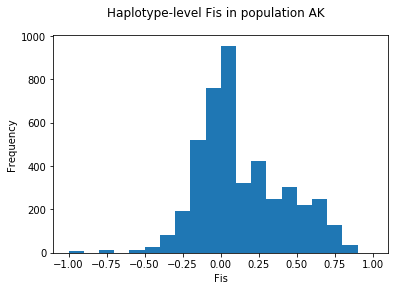

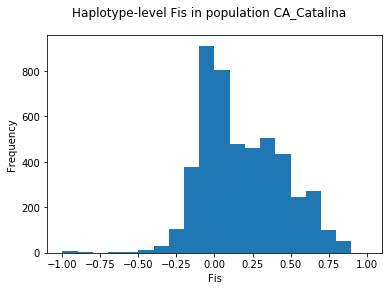

In [32]:
import numpy as np
import matplotlib.pyplot as plt

actual_names = ["WA_Strait","WA_SanJuans","WA_Dabob","AK","CA_Catalina"]
for i in range(0,len(header_pops)):
    plt.hist(fis_sets[i], bins = np.arange(-1, 1.1, .1))
    plt.suptitle("Haplotype-level Fis in population " + actual_names[i])
    plt.xlabel("Fis")
    plt.ylabel("Frequency")
    plt.show()

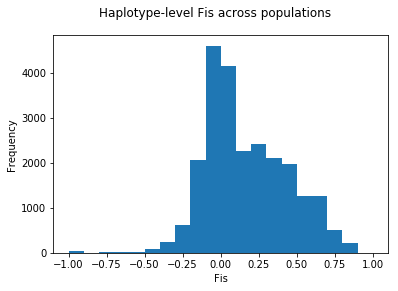

In [33]:
plt.hist(tag_all_fis, bins = np.arange(-1, 1.1, .1))
plt.suptitle("Haplotype-level Fis across populations")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()